In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

In [3]:
data = pd.read_csv('new_appdata1029.csv')

In [4]:
#Data Preprocessing
X = data.drop('enrolled', axis=1)
y = data['enrolled']

In [5]:
#Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#Build and Train the Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
#Make Predictions
y_pred = rf_model.predict(X_test)
print(y_pred)

[0 1 0 ... 1 1 0]


In [8]:
#Evaluate Model Performance
#Accuracy is a straightforward metric that measures the overall correctness of a model.
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7855


In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate Precision
precision = precision_score(y_test, y_pred)

# Calculate Recall
recall = recall_score(y_test, y_pred)

# Calculate F1 Score
f1 = f1_score(y_test, y_pred)

# Print the results
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.8102269194902083
Recall: 0.8494378360762588
F1 Score: 0.829369183040331


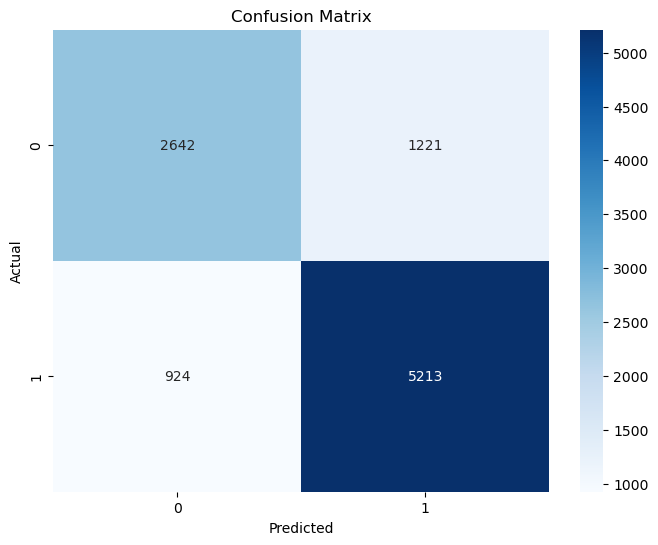

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

In [11]:
#k-fold cross validation 

In [12]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform K-Fold Cross-Validation (e.g., K=5)
k = 5

# Use cross_val_score to get accuracy scores for each fold
scores = cross_val_score(rf_model, X, y, cv=k, scoring='accuracy')

# Print the accuracy for each fold
for fold, accuracy in enumerate(scores, 1):
    print(f'Fold {fold}: Accuracy = {accuracy:.2f}')

# Calculate and print the mean accuracy and standard deviation
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print(f'Mean Accuracy: {mean_accuracy:.2f}')
print(f'Standard Deviation: {std_accuracy:.2f}')


Fold 1: Accuracy = 0.78
Fold 2: Accuracy = 0.79
Fold 3: Accuracy = 0.78
Fold 4: Accuracy = 0.78
Fold 5: Accuracy = 0.78
Mean Accuracy: 0.78
Standard Deviation: 0.00


In [13]:
#Model tuning, often referred to as hyperparameter tuning, involves finding the best set of hyperparameters
#for your machine learning model to improve its performance

#You can use techniques like Grid Search or Random Search to find the optimal hyperparameters

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameters grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
}

# Create the Grid Search
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')

# Perform the Grid Search
grid_search.fit(X, y)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Print the best cross-validated accuracy
best_accuracy = grid_search.best_score_
print(f"Best Cross-Validated Accuracy: {best_accuracy:.2f}")


Best Hyperparameters: {'max_depth': 20, 'n_estimators': 200}
Best Cross-Validated Accuracy: 0.79


In [16]:
train_identifier = X_train['user']
X_train = X_train.drop(columns = 'user')
test_identifier = X_test['user']
X_test = X_test.drop(columns = 'user')

In [17]:
# Formatting Final Results
final_results = pd.concat([y_test, test_identifier], axis = 1).dropna()
final_results['predicted_reach'] = y_pred
final_results = final_results[['user', 'enrolled', 'predicted_reach']].reset_index(drop=True)

In [18]:
print(final_results)

        user  enrolled  predicted_reach
0      48024         1                0
1     266463         1                1
2     262169         1                0
3     213736         1                0
4     169082         1                1
...      ...       ...              ...
9995  367119         0                1
9996    4433         0                0
9997  146917         1                1
9998   77281         1                1
9999   40310         0                0

[10000 rows x 3 columns]
